In [9]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn")

%matplotlib inline
plt.style.use('fast')
font1 = {'family':'serif','color':'black','size':20}

In [10]:
from data_handle import global_temperature_data

predictors = "year" #set the column year as the predictor
target = "LandAverageTemperature" #set the column LandAverageTemperature as the thing we need to predict

test, train, x_test, x_train, y_train, future_x, future_y = global_temperature_data(predictors, target)

global_temperatures = pd.read_csv('globaltemperature/GlobalTemperatures.csv', parse_dates=['dt']) #read the data from csv
mean_temp_year = global_temperatures.groupby(global_temperatures.dt.dt.year).mean().drop('dt', axis=1).reset_index().rename({'dt': 'year'}, axis = 1) #group the data by year and made some modifications in the columns
mean_temp_year = mean_temp_year[mean_temp_year.LandAverageTemperatureUncertainty <= 1] #filter out entries with uncertainty > 1 degree celsius
mean_temp_year.head(3)

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
90,1840,7.796250,0.991167,NaN,NaN,NaN,NaN,NaN,NaN
91,1841,7.688167,0.952000,NaN,NaN,NaN,NaN,NaN,NaN
92,1842,8.022750,0.897500,NaN,NaN,NaN,NaN,NaN,NaN


# Linear

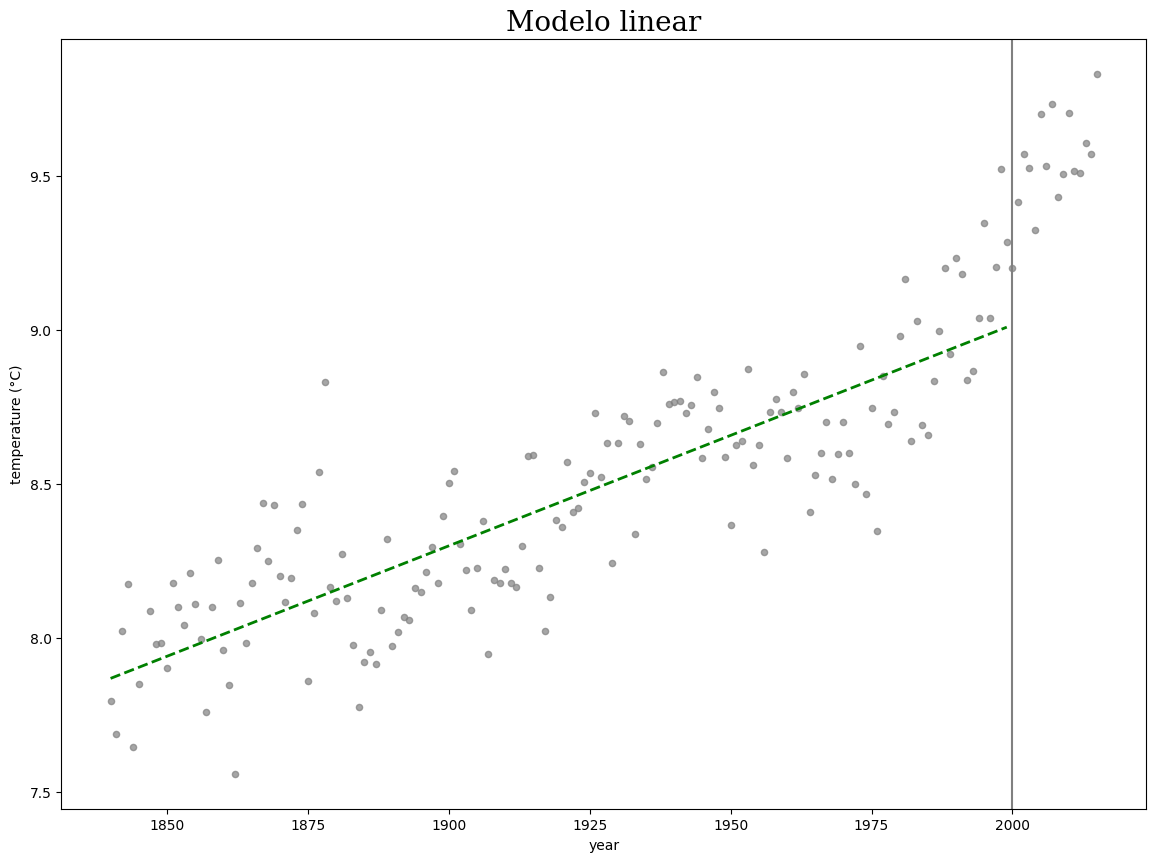

In [11]:
linear = Ridge(alpha=1) #set the ridge regression from sklearn
linear.fit(x_train, y_train) #apply the ridge regression from sklearn
linear_predictions = linear.predict(x_train) #predict data of train set with ridge regression 

# making plot bigger
plt.rcParams['figure.figsize'] = [14, 10]

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Modelo linear', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, linear_predictions, color='green', lw = 2, ls = '--')
plt.savefig('linear.png', format = 'png')
plt.show()

# Polynomial

In [12]:
degrees = [2, 4, 6] #set the polynom degress to test
multi_poly_predictions = []

for i in degrees: #execute the model for each degree
    model = make_pipeline(PolynomialFeatures(i), Ridge(alpha=1)) 
    model.fit(x_train, y_train)
    multi_poly_predictions.append(model.predict(x_train))

# 2 grau

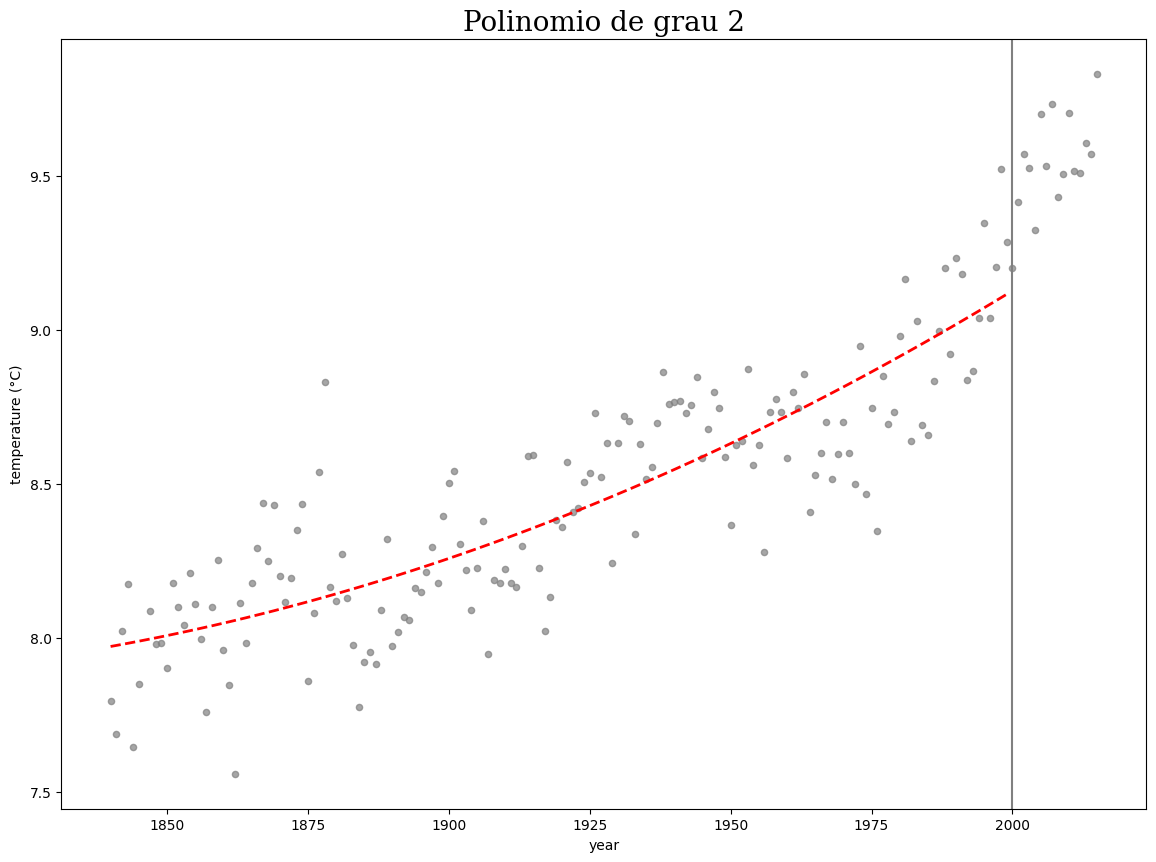

In [13]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 2', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, multi_poly_predictions[0], color='red', lw = 2, ls = '--')

plt.savefig('2d_model.png', format = 'png')
plt.show()

# 4 grau

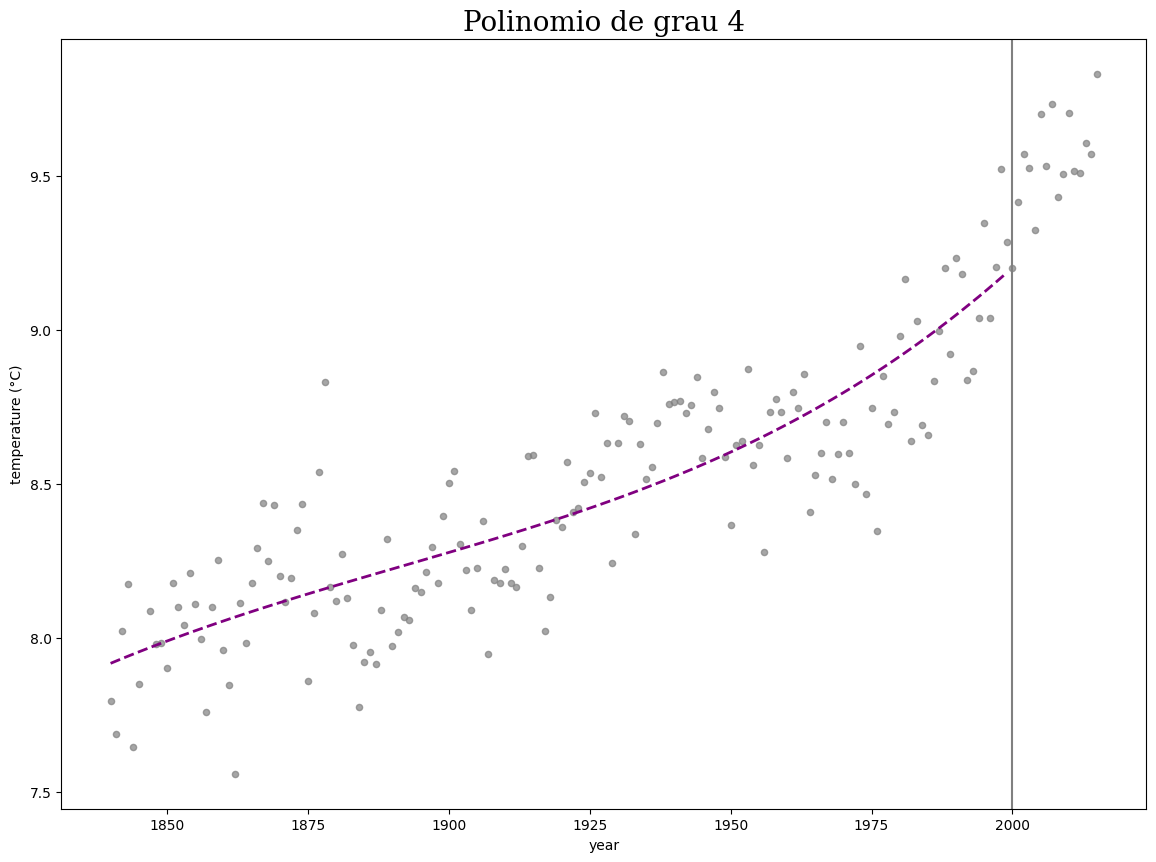

In [14]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 4', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, multi_poly_predictions[1], color='purple', lw = 2, ls = '--')

plt.savefig('4d_model.png', format = 'png')
plt.show()

# 6 grau

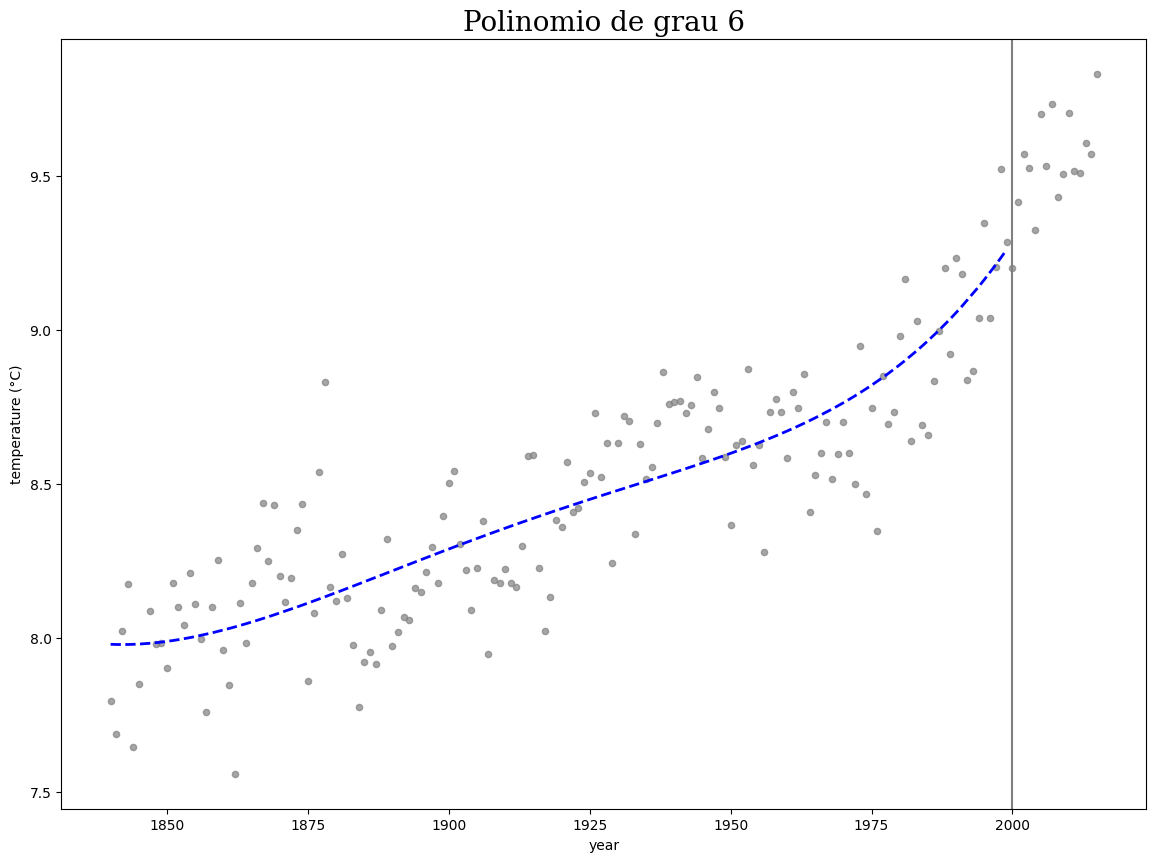

In [15]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 6', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, multi_poly_predictions[2], color='blue', lw = 2, ls = '--')

plt.savefig('6d_model.png', format = 'png')
plt.show()